In [9]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns

# Import to split the data
from sklearn.model_selection import train_test_split

# Import to fix the NaN values
from sklearn.impute import SimpleImputer

# Import to standarize or Normalize the features
from sklearn.preprocessing import StandardScaler

# Import to tune the hyperparameter  
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve

# Import to evaluate the model 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.dummy import DummyClassifier

# Importing the models needed for CLASSIFICATION machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Import to visualize the results
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, auc

# Loading the csv as a dataset
waterQuality_df = pd.read_csv("../CA1/Datasets/CA1-Classification-Dataset.csv")

Showing the first 5 rows of the dataset:
         ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes   Clarity  Quality  
0       10.379783        86.990970  2.963135        0  
1       15.180013        56.329076  4.500656        0  
2       16.868637        66.420093  3.055934        0  
3       18.436525       100.341674  4.628771        0  
4       11.558279        31.997993  4.075075        0  

Describing the dataset:
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3

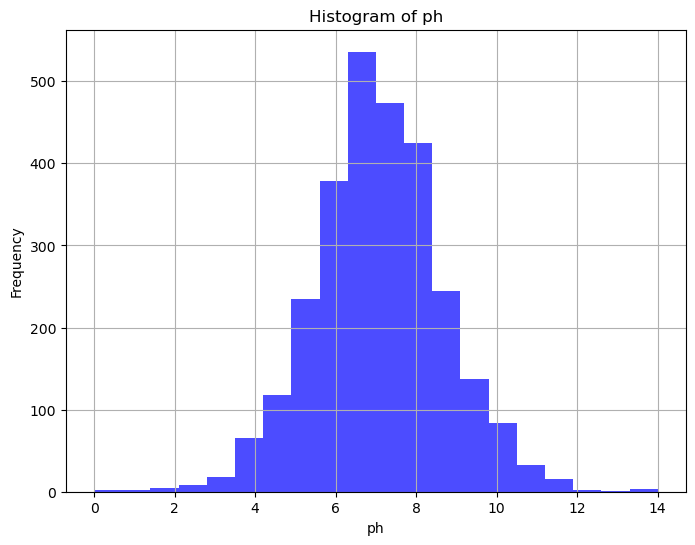

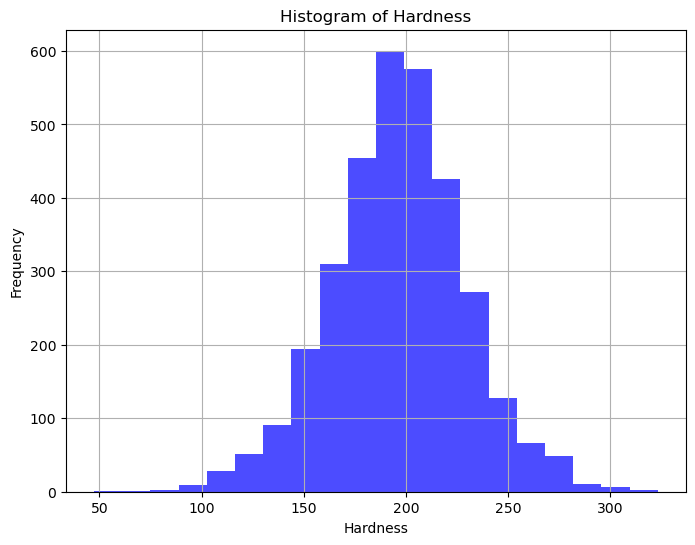

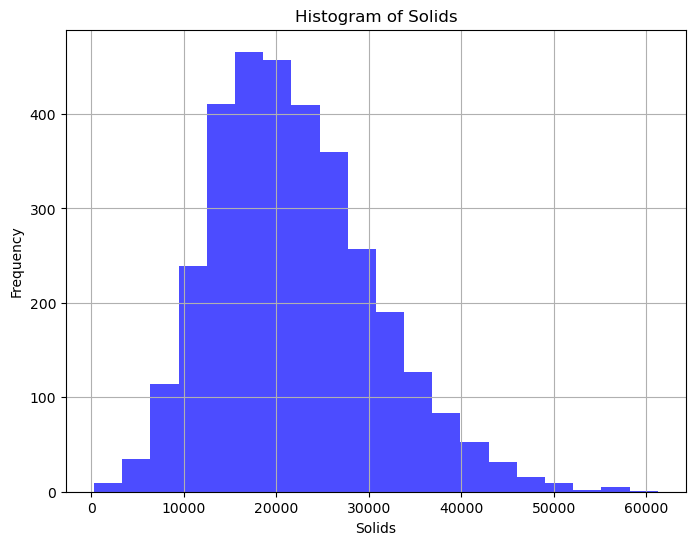

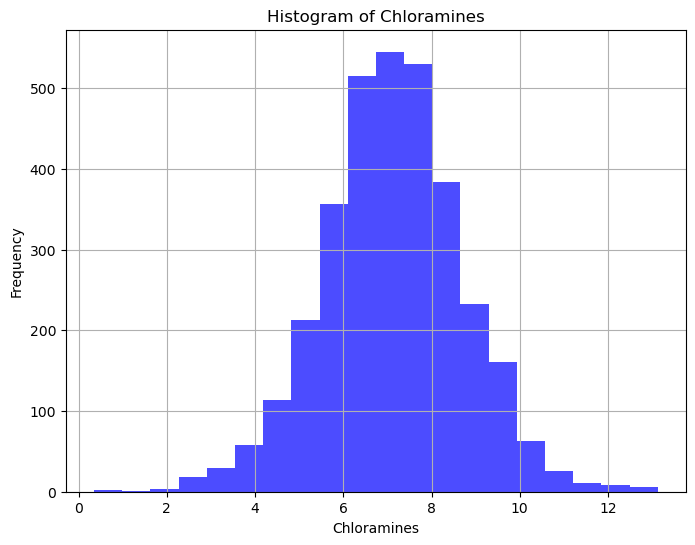

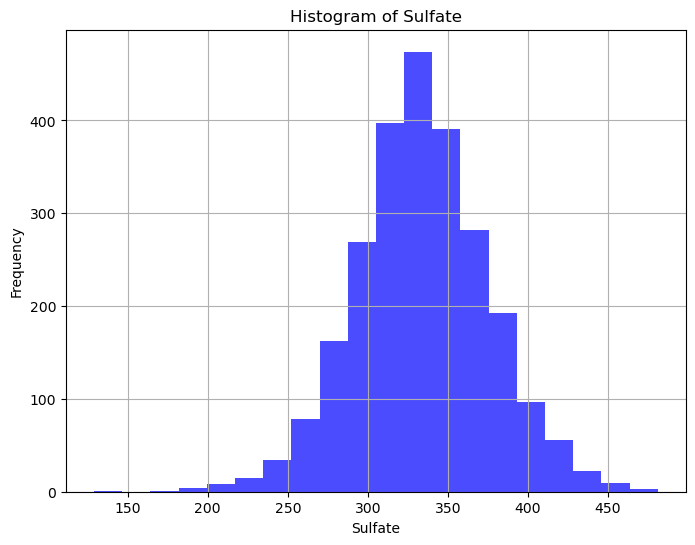

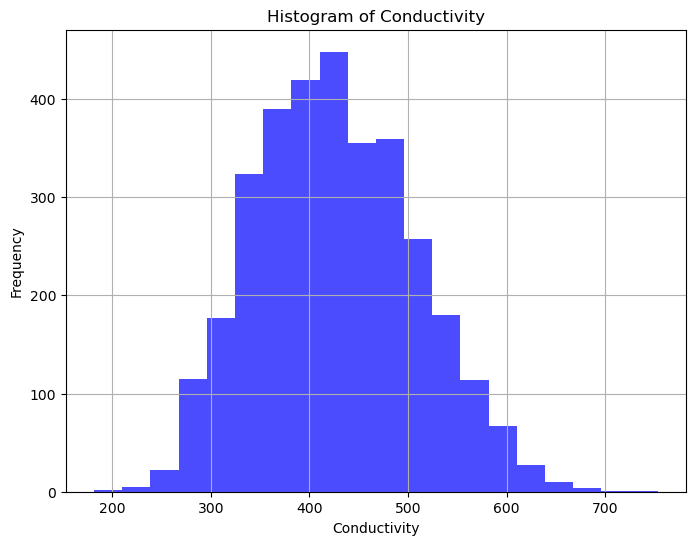

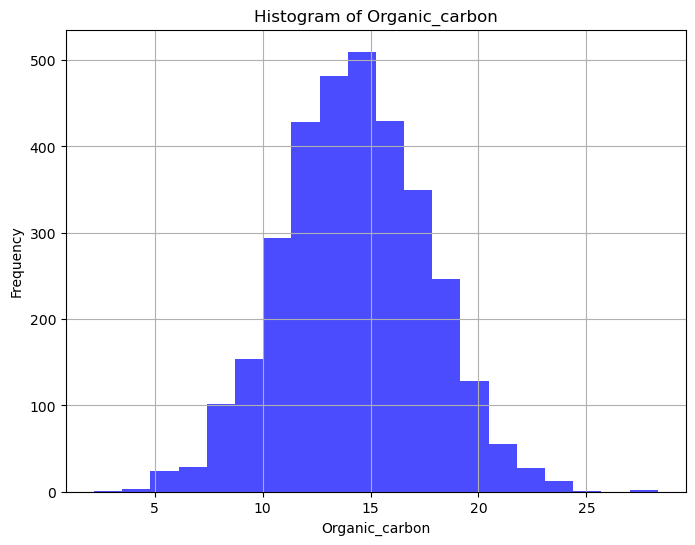

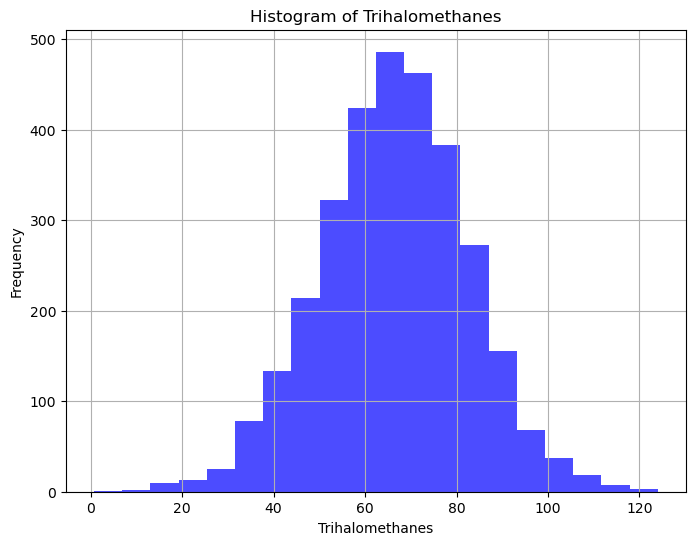

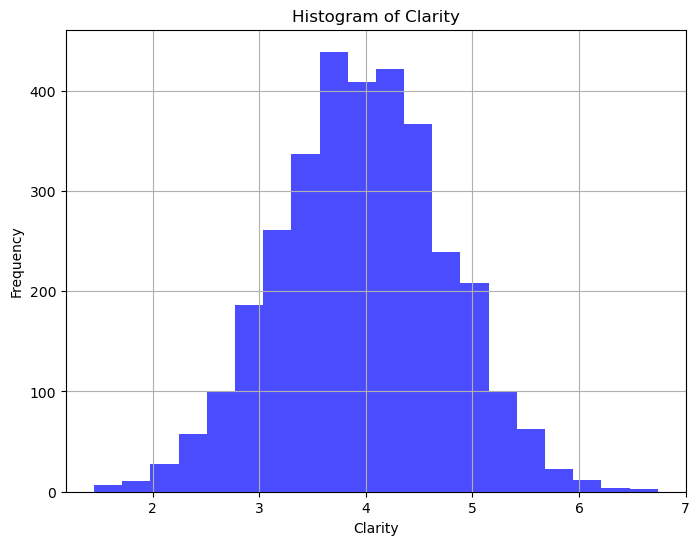

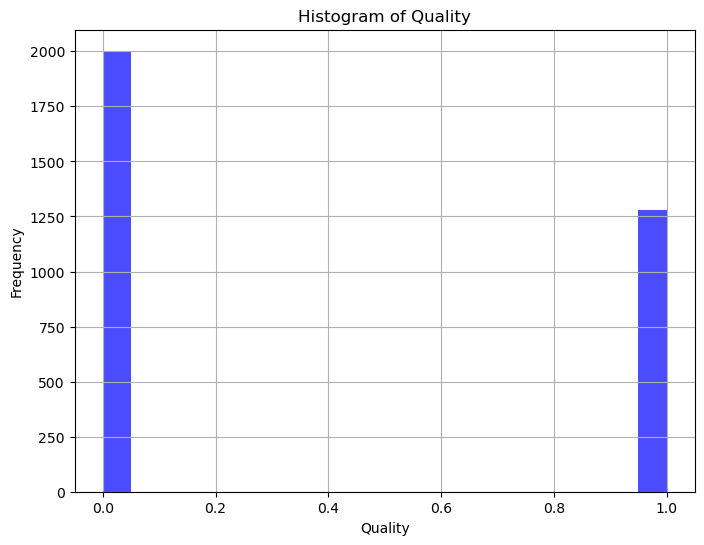

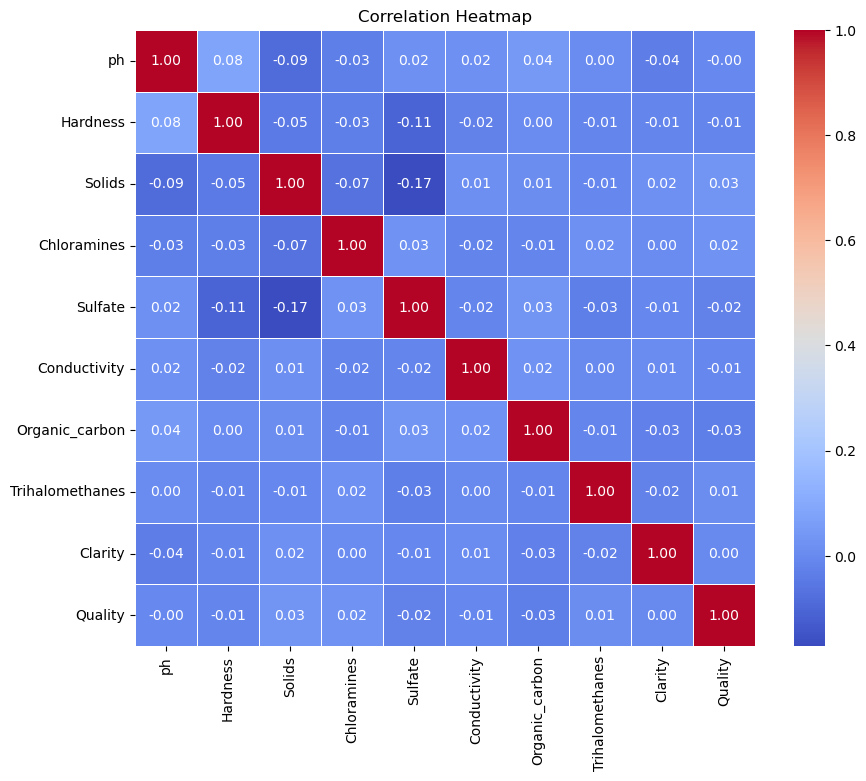

C:\Users\caleb\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


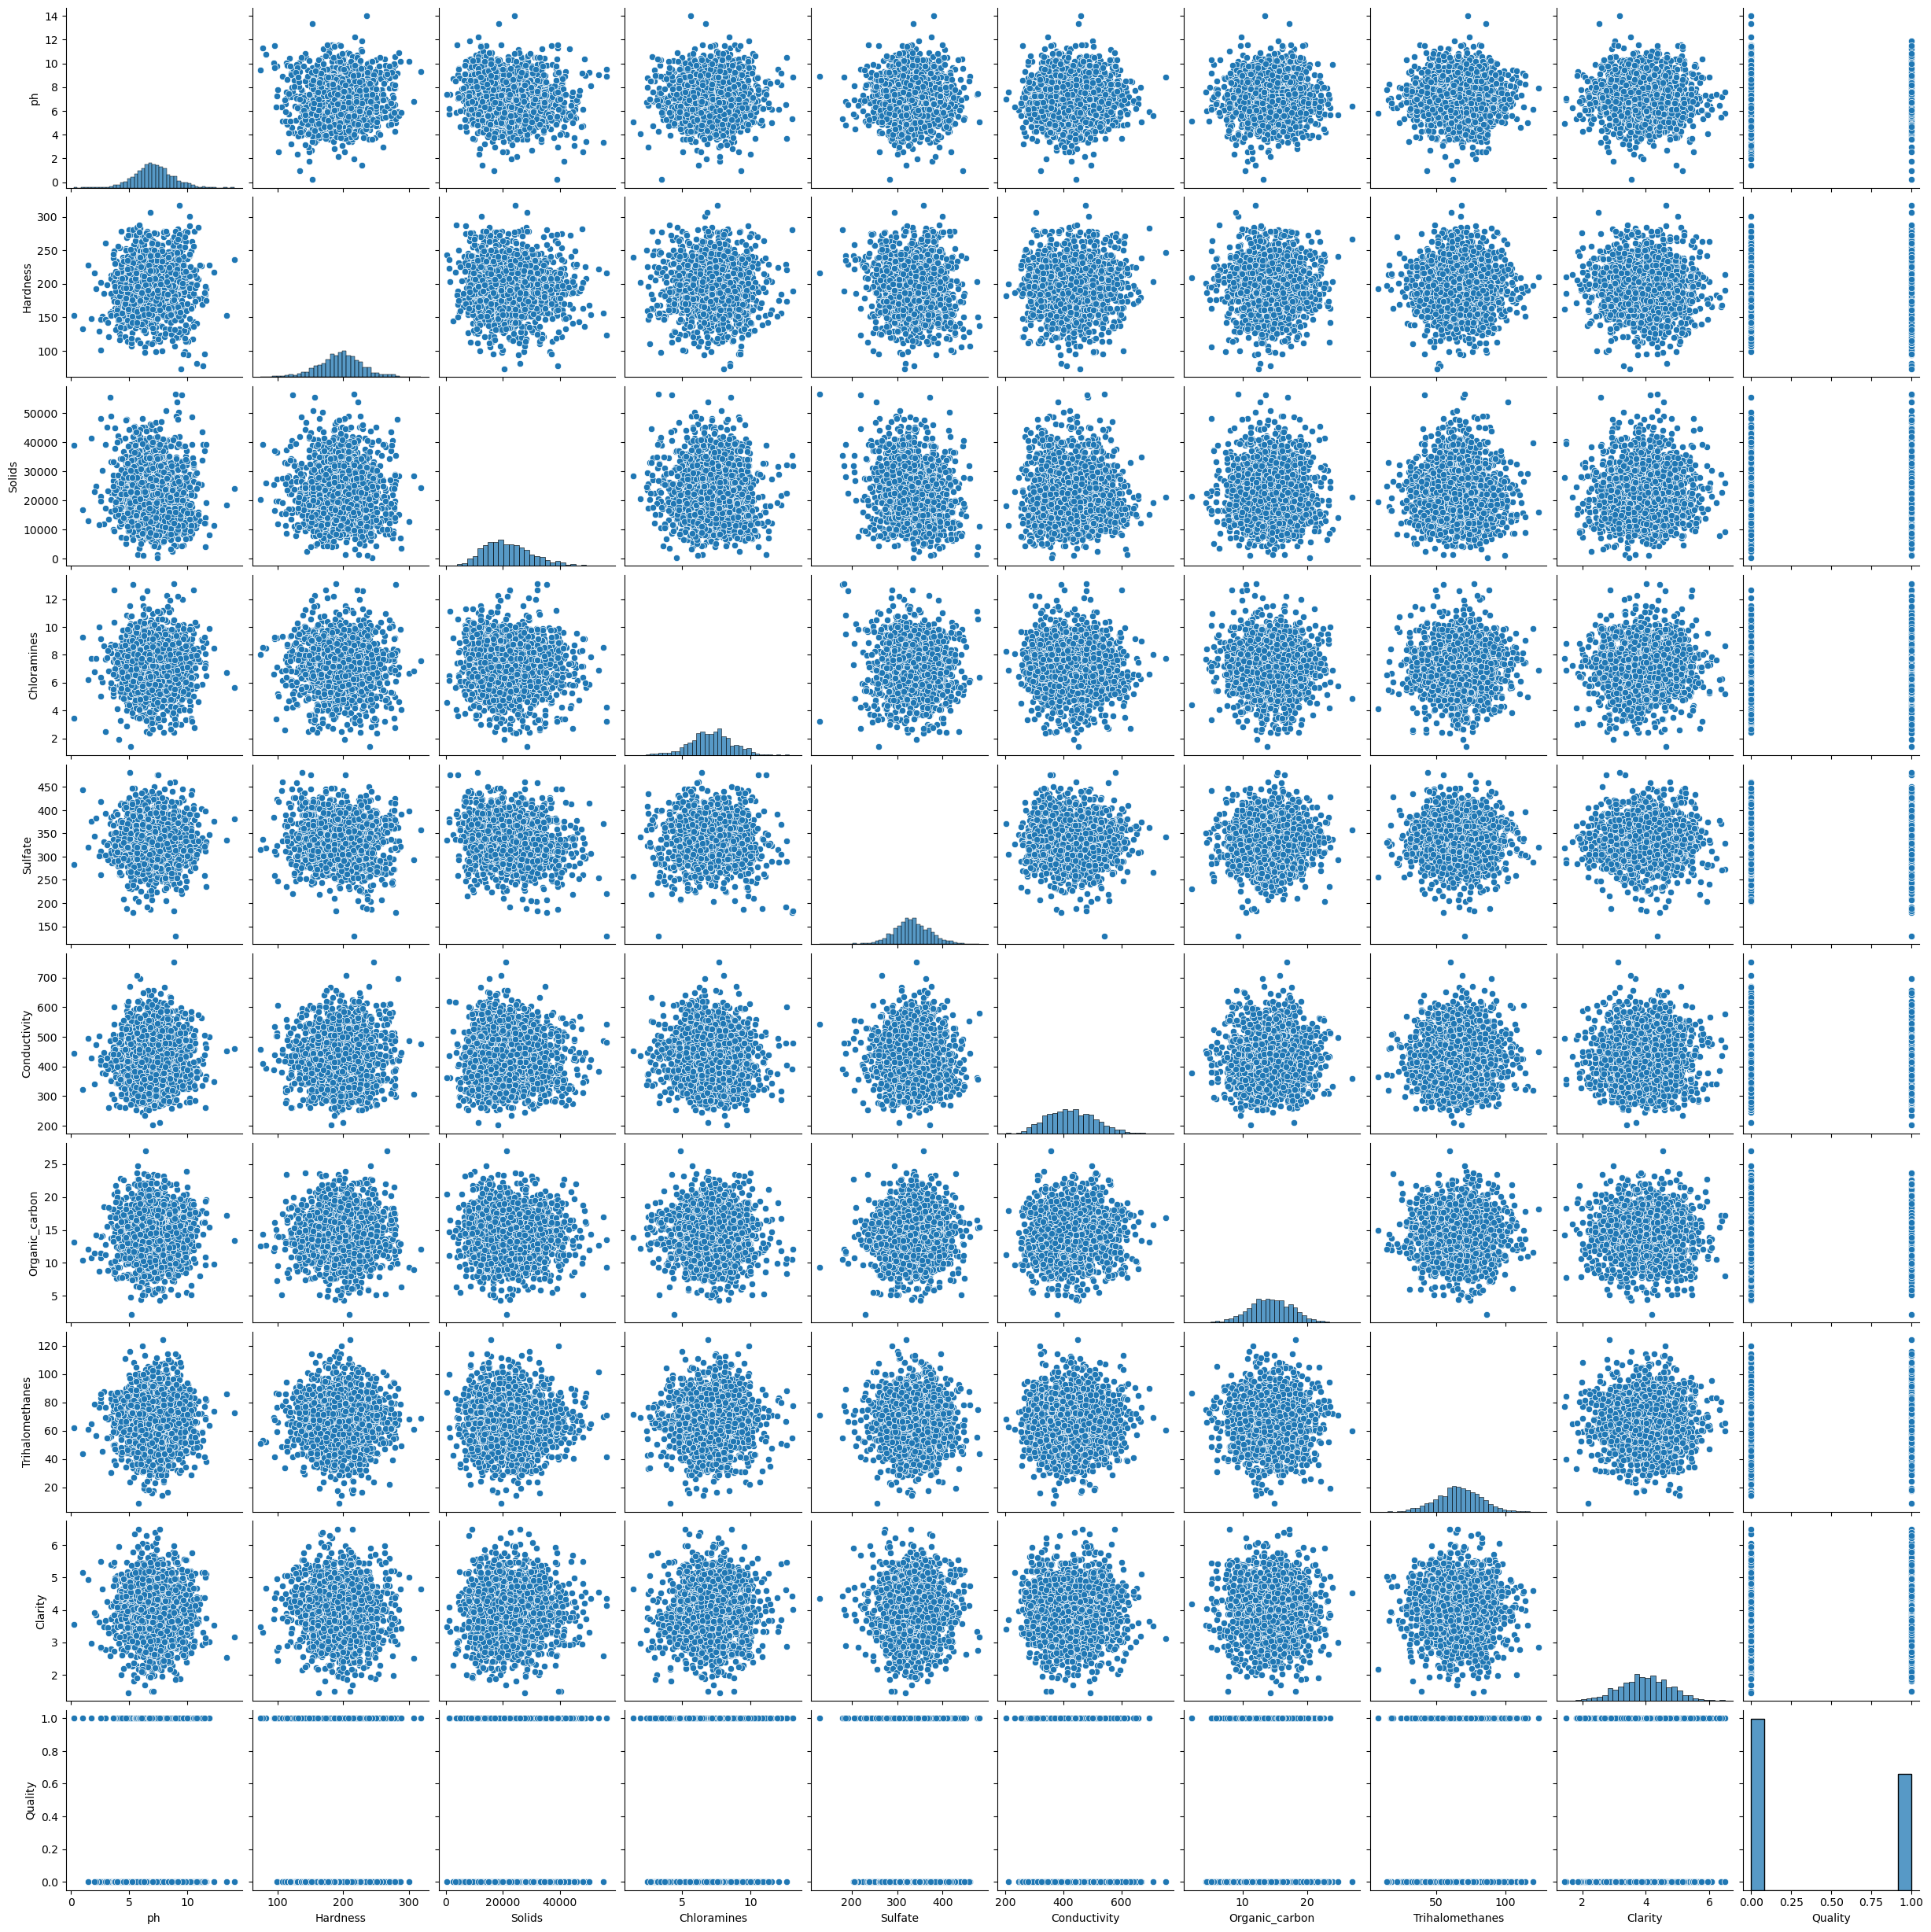

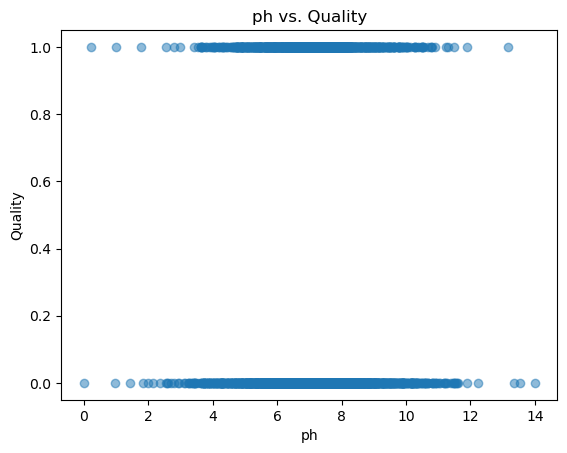

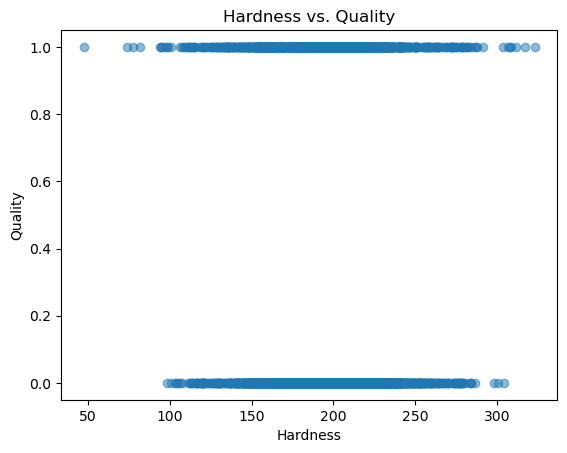

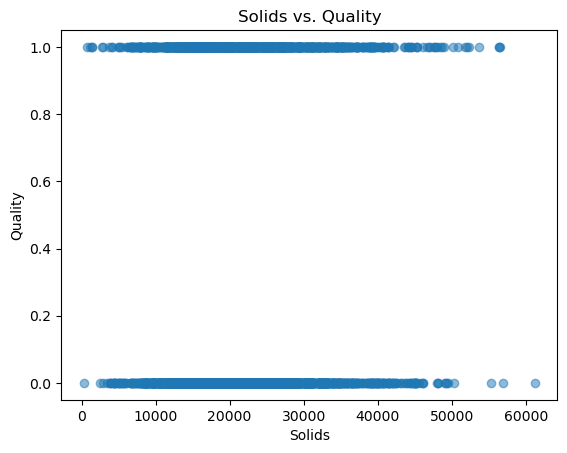

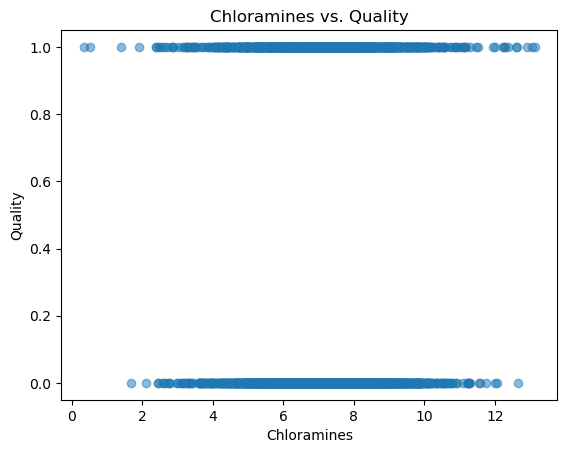

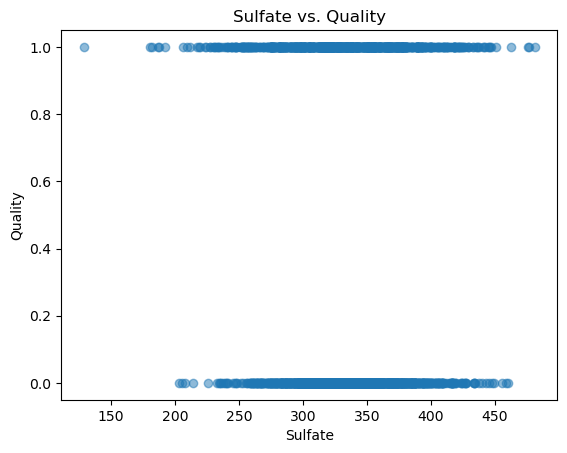

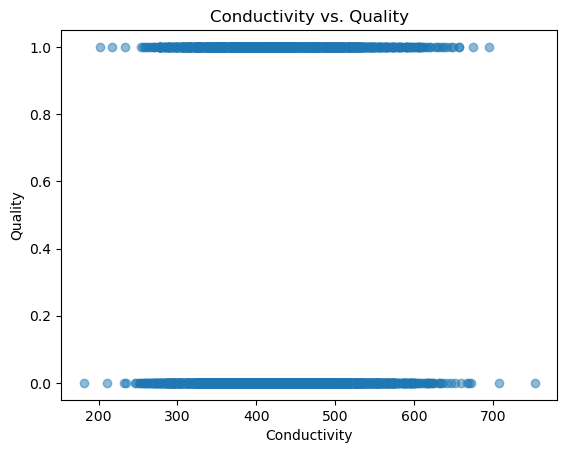

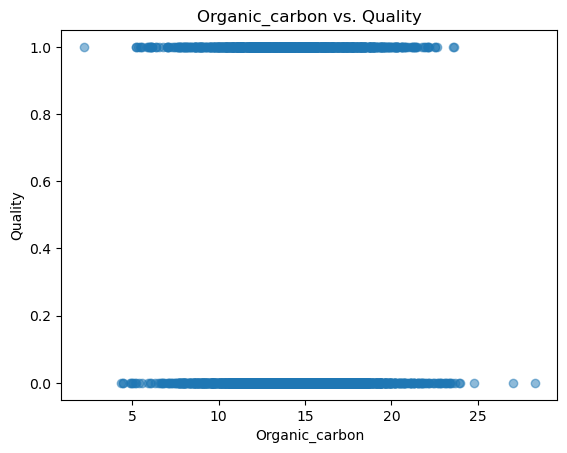

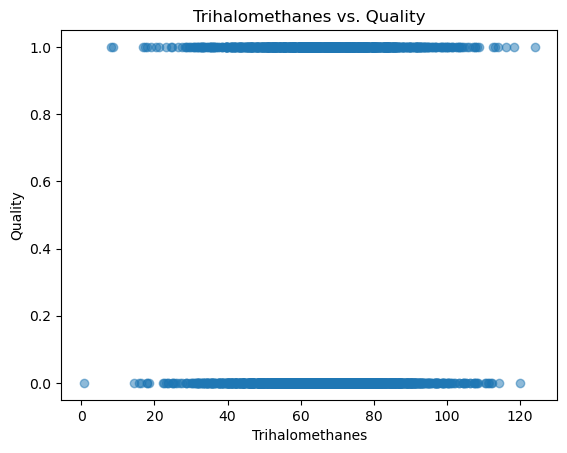

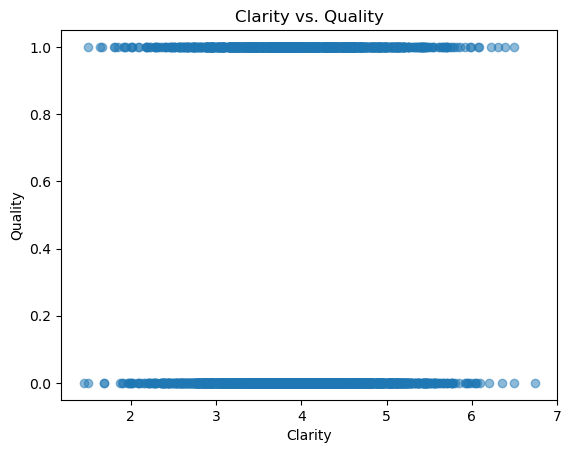

In [10]:
# Data exploration

# Show the dataset in a table
print("Showing the first 5 rows of the dataset:")
print(waterQuality_df.head(5))

# Describe the dataset
print("\nDescribing the dataset:")
print(waterQuality_df.describe())

# Display basic information about the dataset
print(waterQuality_df.info())

# Checking the data for the NaN values
print("Number of NaN values in each column:\n",waterQuality_df.isna().sum().sort_values())

# Plot histograms to see the distribution for each variable
for column in waterQuality_df.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(waterQuality_df[column].dropna(), bins=20, color='blue', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Compute the correlation matrix
correlation_matrix = waterQuality_df.corr()
# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Convert 'ph' column to numeric
waterQuality_df['ph'] = pd.to_numeric(waterQuality_df['ph'], errors='coerce')
# Plot scatter matrix for selected columns
selected_columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Clarity', 'Quality']
sns.pairplot(waterQuality_df[selected_columns].dropna())  # Drop NaN values for better visualization
plt.show()

# Assuming "Quality" is the target variable
target_variable = 'Quality'
# Get the list of columns excluding the target variable
feature_columns = [col for col in waterQuality_df.columns if col != target_variable]
# Create scatter plots for each feature against the target variable
for feature in feature_columns:
    plt.scatter(waterQuality_df[feature], waterQuality_df[target_variable], alpha=0.5)
    plt.title(f'{feature} vs. {target_variable}')
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.show()

In [11]:
# Creating the feature(X) and target(y) arrays
X = waterQuality_df.drop("Quality", axis=1).values
y = waterQuality_df["Quality"].values

# To check if the arrays are numpy.ndarray
print(type(X), type(y))

# Prints the dimensions of the feature and target
print(f'dimension of input feature: {X.shape}')
print(f'dimension of output target: {y.shape}') 


<class 'numpy.ndarray'> <class 'numpy.ndarray'>
dimension of input feature: (3276, 9)
dimension of output target: (3276,)


In [12]:
# Splitting the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Printing the dimension of the training and testing set
print(f'dimension of training set: {X_train.shape}')
print(f'dimension of testing set: {X_test.shape}')

dimension of training set: (2620, 9)
dimension of testing set: (656, 9)


In [13]:
# Checking the data for the NaN values
print("Number of NaN values in each column:\n",waterQuality_df.isna().sum().sort_values())

# Cleaning the data 
imp_quality = SimpleImputer(strategy="most_frequent")

X_train = imp_quality.fit_transform(X_train)
X_test = imp_quality.transform(X_test)

# Checking for NaN values in the training set after imputation
print("\nNaN values in the training set after imputation:")
print(pd.DataFrame(X_train).isna().sum().sort_values())

# Checking for NaN values in the testing set after imputation
print("\nNaN values in the testing set after imputation:")
print(pd.DataFrame(X_test).isna().sum().sort_values())

Number of NaN values in each column:
 Hardness             0
Solids               0
Chloramines          0
Conductivity         0
Organic_carbon       0
Clarity              0
Quality              0
Trihalomethanes    162
ph                 491
Sulfate            781
dtype: int64

NaN values in the training set after imputation:
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

NaN values in the testing set after imputation:
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64


In [14]:
# Scaling and centering the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check if the values are scaled by comparing the mean and std
print("Mean,std before scaling:")
print(np.mean(X_train),np.std(X_train))
print("\nMean,std after scaling:")
print(np.mean(X_train_scaled),np.std(X_train_scaled))

Mean,std before scaling:
2579.0814900382447 7540.805300512412

Mean,std after scaling:
1.0456248062288159e-15 1.0000000000000004


Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 10}
Confusion_matrix of Logistic Regression Model:
 [[396   1]
 [259   0]]

Classification report of Logistic Regression Model:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75       397
           1       0.00      0.00      0.00       259

    accuracy                           0.60       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.60      0.46       656

Accuracy: 60.37%
Dummy Baseline:  0.6051829268292683


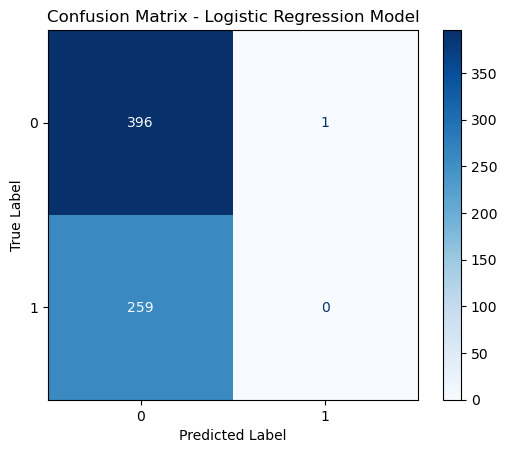

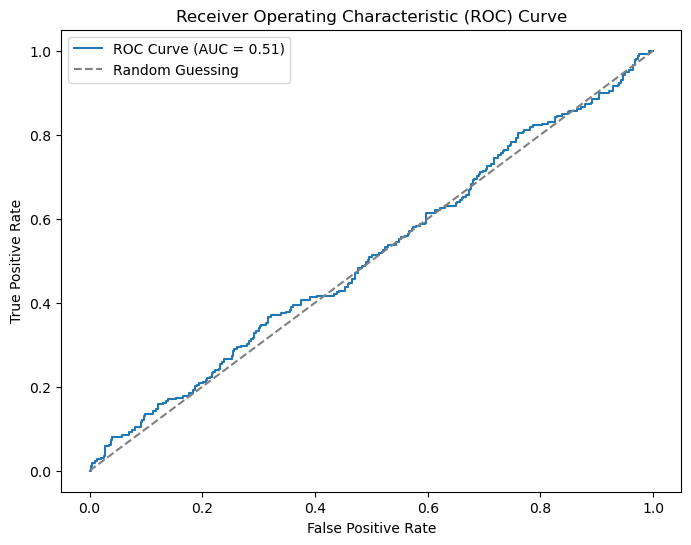

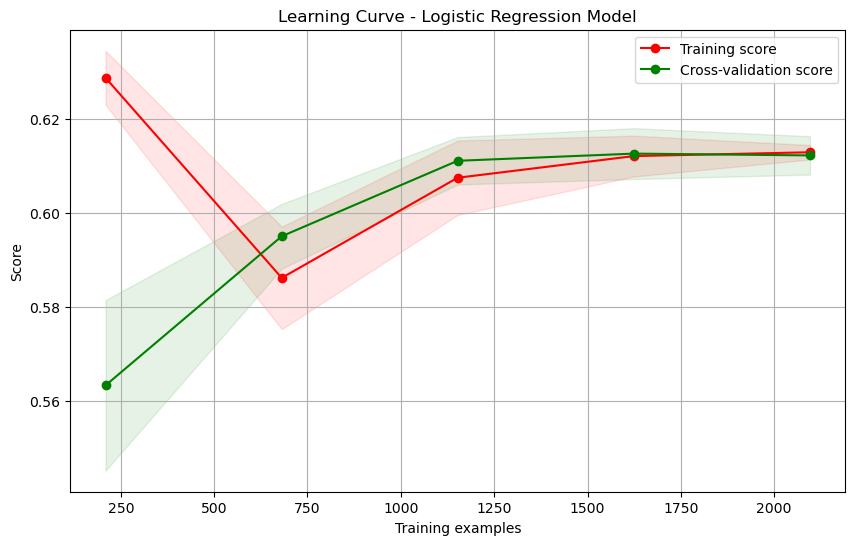

In [15]:
# Define the Logistic Regression model
logreg_model = LogisticRegression()

# Define hyperparameters and their possible values for tuning
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],       # Inverse of regularization strength
    'penalty': ['l1', 'l2'],                   # Regularization type
    'solver': ['liblinear', 'saga']            # Optimization algorithm
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(logreg_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters found by RandomizedSearchCV
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model from RandomizedSearchCV
best_logreg_model = random_search.best_estimator_

# Make predictions using the best model
y_pred = best_logreg_model.predict(X_test_scaled)

# Printing confusion matrix, classification report, accuracy score   
print("Confusion_matrix of Logistic Regression Model:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report of Logistic Regression Model:\n", classification_report(y_test, y_pred))
accuracy_logreg = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_logreg * 100:.2f}%")

# Dummy Baseline
clf_logreg = DummyClassifier(strategy='most_frequent', random_state=0)
clf_logreg.fit(X_train_scaled, y_train)
dummy_Score_logreg = clf_logreg.score(X_test_scaled, y_test)
print("Dummy Baseline: ", dummy_Score_logreg)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_logreg_model.classes_)
disp.plot(cmap='Blues', values_format='d')

# Add title and labels
plt.title('Confusion Matrix - Logistic Regression Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

# Get the predicted probabilities for the positive class
y_pred_prob = best_logreg_model.predict_proba(X_test_scaled)[:, 1]

# Compute the ROC curve
fpr_logreg, tpr_logreg, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the area under the ROC curve (AUC)
roc_auc_logreg = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'ROC Curve (AUC = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")

    return plt

# Plot learning curve for Logistic Regression model
plot_learning_curve(best_logreg_model, "Learning Curve - Logistic Regression Model", X_train_scaled, y_train, cv=5, n_jobs=-1)
plt.show()

Cross-validation accuracy: 57.40%
Cross-Validation Scores: [0.57442748 0.58396947 0.54389313 0.60114504 0.56679389]
Mean CV Score: 0.5740458015267176
CV Std Score: 0.018946066635100556
CV Quartile Score: [0.54618321 0.59942748]

Confusion_matrix of KNearestNeighbor Model:
 [[317  80]
 [200  59]]

Classification report of KNearestNeighbor Model:
               precision    recall  f1-score   support

           0       0.61      0.80      0.69       397
           1       0.42      0.23      0.30       259

    accuracy                           0.57       656
   macro avg       0.52      0.51      0.50       656
weighted avg       0.54      0.57      0.54       656

Accuracy: 57.32%
Dummy Baseline:  0.6051829268292683


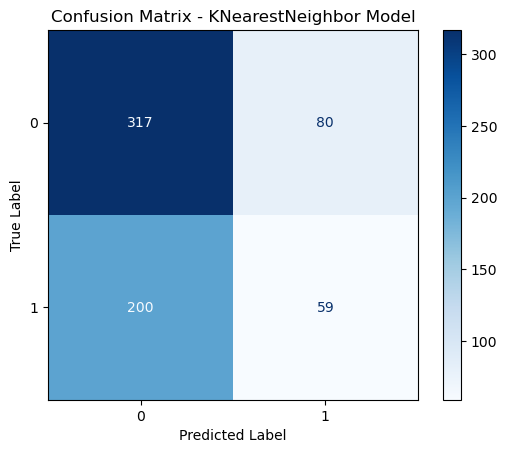

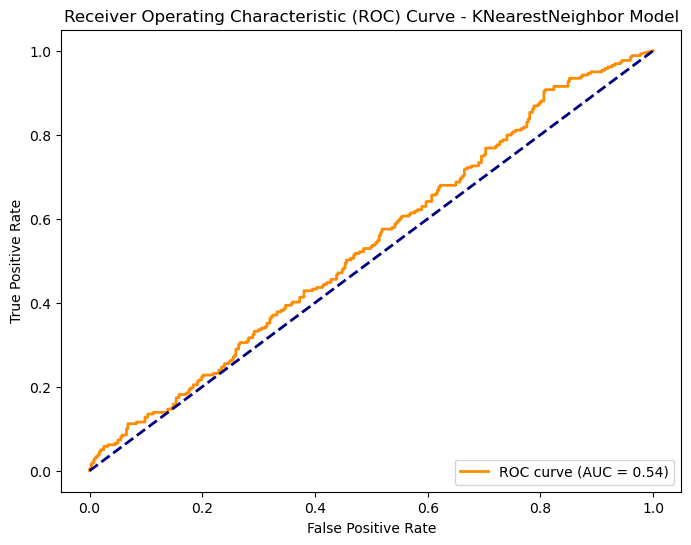

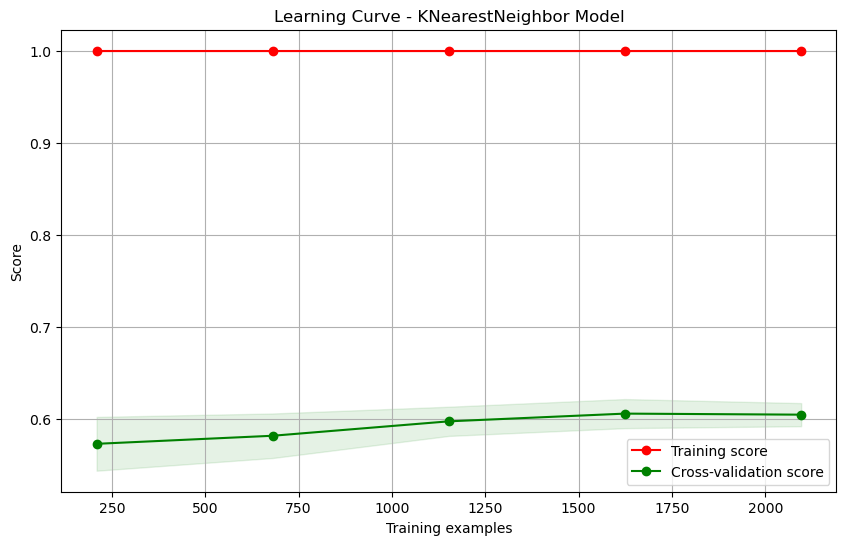

In [16]:
# Using the KNearestNeighbor model for the classification problem
knn_model = KNeighborsClassifier()

# Hyperparameter tuning
param_dist = {'n_neighbors': [3, 6, 9], 'weights': ['uniform', 'distance']}
random_search = RandomizedSearchCV(knn_model, param_distributions=param_dist, n_iter=3, cv=5, random_state=42)
# Training the model
random_search.fit(X_train_scaled, y_train)

best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_

# Make predictions on the test set
y_pred_knn = best_model_random.predict(X_test_scaled)

# Perform cross-validation
cv_score_knn = cross_val_score(best_model_random, X_train, y_train, cv=5)  # cv is the number of folds
print(f"Cross-validation accuracy: {np.mean(cv_score_knn) * 100:.2f}%")

# Print cross-validation scores
print("Cross-Validation Scores:", cv_score_knn )
print("Mean CV Score:", np.mean(cv_score_knn ))
print("CV Std Score:", np.std(cv_score_knn ))
print("CV Quartile Score:", np.quantile(cv_score_knn , [0.025, 0.975]))

# Printing confusion matrix, classification report, accuracy score   
print("\nConfusion_matrix of KNearestNeighbor Model:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification report of KNearestNeighbor Model:\n", classification_report(y_test, y_pred_knn))
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn * 100:.2f}%")

# Dummy Baseline
clf_knn = DummyClassifier(strategy='most_frequent', random_state=0)
clf_knn.fit(X_train_scaled, y_train)
dummy_Score_knn = clf_knn.score(X_test_scaled, y_test)
print("Dummy Baseline: ", dummy_Score_knn)

# Create confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Display the confusion matrix using ConfusionMatrixDisplay
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=best_model_random.classes_)
disp_knn.plot(cmap='Blues', values_format='d')

# Add title and labels
plt.title('Confusion Matrix - KNearestNeighbor Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

# Get the predicted probabilities for the positive class
y_prob_knn = best_model_random.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNearestNeighbor Model')
plt.legend(loc='lower right')
plt.show()

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    
    return plt

# Plot learning curve
plot_learning_curve(best_model_random, "Learning Curve - KNearestNeighbor Model", X_train_scaled, y_train, cv=5, n_jobs=-1)
plt.show()

Cross-validation accuracy: 61.34%
Cross-Validation Scores: [0.61068702 0.6221374  0.62022901 0.61450382 0.59923664]
Mean CV Score: 0.6133587786259541
CV Std Score: 0.008150441413764337
CV Quartile Score: [0.60038168 0.62194656]

Confusion_matrix of Naive Bayes Model:
 [[376  21]
 [231  28]]

Classification report of Naive Bayes Model:
               precision    recall  f1-score   support

           0       0.62      0.95      0.75       397
           1       0.57      0.11      0.18       259

    accuracy                           0.62       656
   macro avg       0.60      0.53      0.47       656
weighted avg       0.60      0.62      0.53       656

Accuracy: 61.59%
Dummy Baseline:  0.6051829268292683


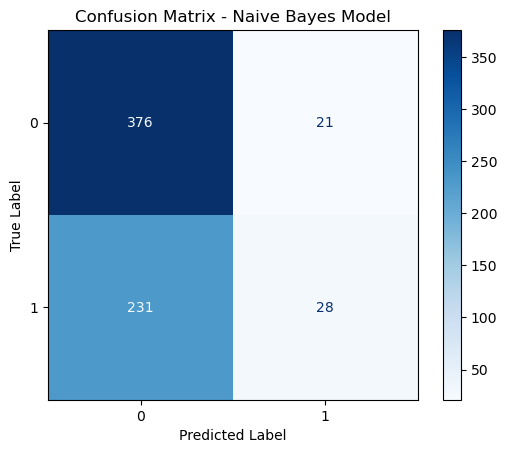

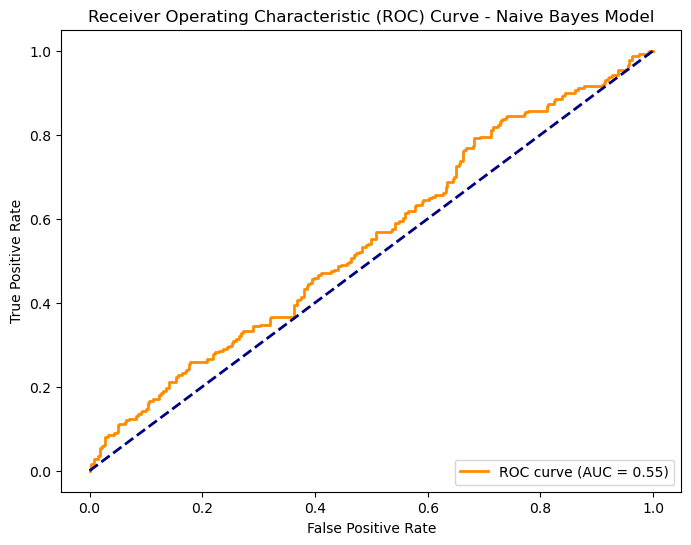

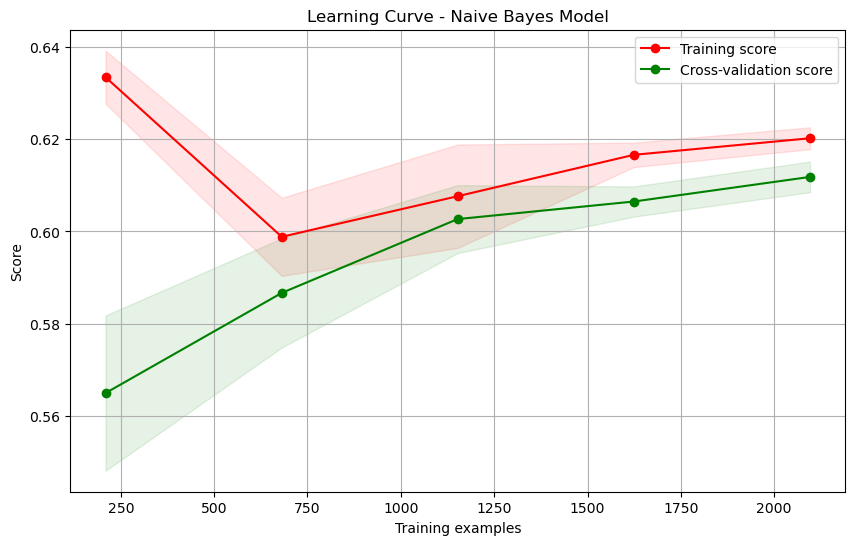

In [17]:
# Using the Naive Bayes model for the classification problem
nb_model = GaussianNB()

# Hyperparameter tuning
param_dist = {'var_smoothing': np.logspace(0, -9, num=100)}
random_search = RandomizedSearchCV(nb_model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

# Training the model
random_search.fit(X_train_scaled, y_train)

best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_

# Make predictions on the test set
y_pred_nb = best_model_random.predict(X_test_scaled)

# Perform cross-validation
cv_score_nb = cross_val_score(best_model_random, X_train, y_train, cv=5) # cv is the number of folds
print(f"Cross-validation accuracy: {np.mean(cv_score_nb) * 100:.2f}%")

# Print cross-validation scores
print("Cross-Validation Scores:", cv_score_nb)
print("Mean CV Score:", np.mean(cv_score_nb))
print("CV Std Score:",np.std(cv_score_nb))
print("CV Quartile Score:",np.quantile(cv_score_nb, [0.025, 0.975]))

# Printing confusion matrix, classification report, accuracy score   
print("\nConfusion_matrix of Naive Bayes Model:\n",confusion_matrix(y_test, y_pred_nb))
print("\nClassification report of Naive Bayes Model:\n", classification_report(y_test,y_pred_nb))
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy: {accuracy_nb * 100:.2f}%")

# Dummy Baseline
clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf.fit(X_train, y_train)
dummy_Score = clf.score(X_test, y_test)
print("Dummy Baseline: ", dummy_Score)

# Create confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Display the confusion matrix using ConfusionMatrixDisplay
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=best_model_random.classes_)
disp_nb.plot(cmap='Blues', values_format='d')

# Add title and labels
plt.title('Confusion Matrix - Naive Bayes Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

# Get the predicted probabilities for the positive class
y_prob_nb = best_model_random.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes Model')
plt.legend(loc='lower right')
plt.show()

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")

    return plt

# Plot learning curve for Naive Bayes model
plot_learning_curve(best_model_random, "Learning Curve - Naive Bayes Model", X_train_scaled, y_train, cv=5, n_jobs=-1)
plt.show()

Best Hyperparameters: {'kernel': 'rbf', 'gamma': 0.1, 'C': 100}
Cross-validation accuracy: 61.34%
Cross-Validation Scores: [0.61068702 0.6221374  0.62022901 0.61450382 0.59923664]
Mean CV Score: 0.6133587786259541
CV Std Score: 0.008150441413764337
CV Quartile Score: [0.60038168 0.62194656]

Confusion_matrix of SVM Model:
 [[296 101]
 [145 114]]

Classification report of SVM Model:
               precision    recall  f1-score   support

           0       0.67      0.75      0.71       397
           1       0.53      0.44      0.48       259

    accuracy                           0.62       656
   macro avg       0.60      0.59      0.59       656
weighted avg       0.62      0.62      0.62       656

Accuracy: 62.50%
Dummy Baseline:  0.6051829268292683


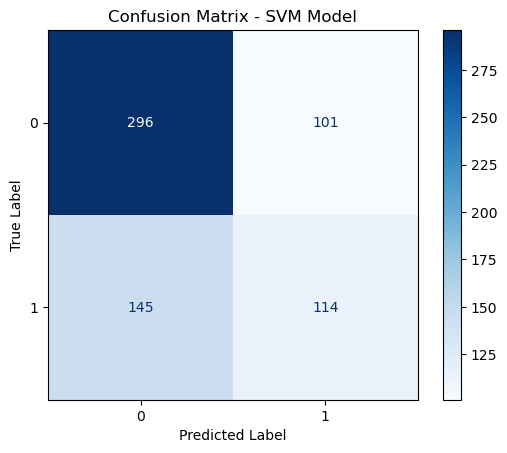

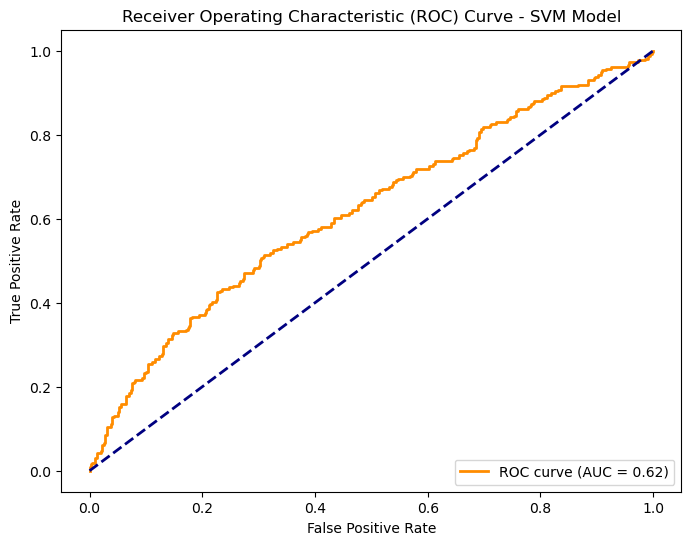

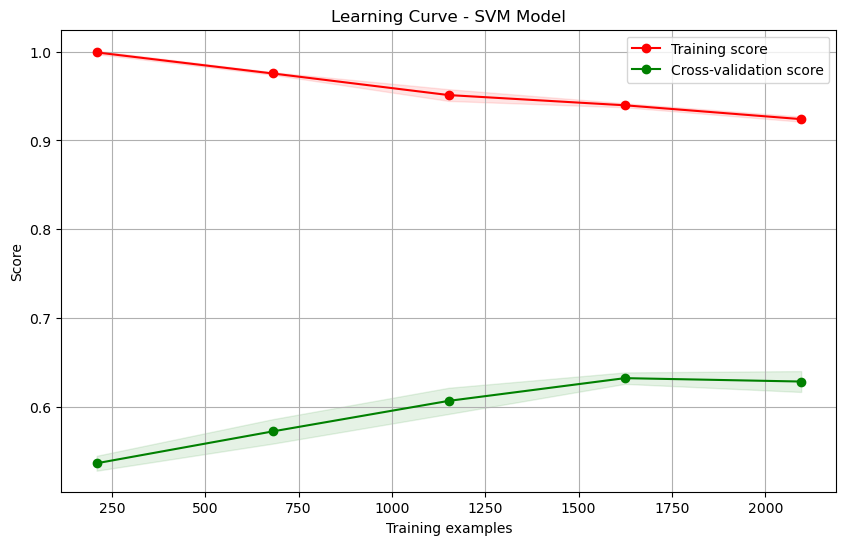

In [18]:
# Using the Support Vector Machine (SVM) model for the classification problem
model_svc = SVC()

# Hyperparameter tuning
param_dist = {
    'C': [0.1, 1, 10, 100],             # Regularization parameter
    'gamma': [0.01, 0.1, 1, 'auto'],    # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly'] # Kernel type
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(model_svc, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters found by RandomizedSearchCV
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model from RandomizedSearchCV
best_model_svc = random_search.best_estimator_

# Make predictions using the best model
y_pred_svc = best_model_svc.predict(X_test_scaled)

# Perform cross-validation
cv_score_svc = cross_val_score(best_model_random, X_train, y_train, cv=5)  # cv is the number of folds
print(f"Cross-validation accuracy: {np.mean(cv_score_svc) * 100:.2f}%")

# Print cross-validation scores
print("Cross-Validation Scores:", cv_score_svc)
print("Mean CV Score:", np.mean(cv_score_svc))
print("CV Std Score:", np.std(cv_score_svc))
print("CV Quartile Score:", np.quantile(cv_score_svc, [0.025, 0.975]))

# Printing confusion matrix, classification report, accuracy score
print("\nConfusion_matrix of SVM Model:\n", confusion_matrix(y_test, y_pred_svc))
print("\nClassification report of SVM Model:\n", classification_report(y_test, y_pred_svc))
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"Accuracy: {accuracy_svc * 100:.2f}%")

# Dummy Baseline
clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf.fit(X_train, y_train)
dummy_Score = clf.score(X_test, y_test)
print("Dummy Baseline: ", dummy_Score)

# Create confusion matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)

# Display the confusion matrix using ConfusionMatrixDisplay
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=best_model_svc.classes_)
disp_svc.plot(cmap='Blues', values_format='d')

# Add title and labels
plt.title('Confusion Matrix - SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

# Get the predicted decision function for the positive class
y_score_svc = best_model_svc.decision_function(X_test_scaled)

# Compute ROC curve and ROC area
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_score_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_svc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM Model')
plt.legend(loc='lower right')
plt.show()

# Plot learning curve for SVM model
plot_learning_curve(best_model_svc, "Learning Curve - SVM Model", X_train_scaled, y_train, cv=5, n_jobs=-1)
plt.show()

Cross-validation accuracy: 65.34%
Cross-Validation Scores: [0.65076336 0.65076336 0.64312977 0.66984733 0.65267176]
Mean CV Score: 0.6534351145038167
CV Std Score: 0.008836516719687203
CV Quartile Score: [0.64389313 0.66812977]

Confusion_matrix of RandomForestClassifier Model:
 [[347  50]
 [185  74]]

Classification report of RandomForestClassifier Model:
               precision    recall  f1-score   support

           0       0.65      0.87      0.75       397
           1       0.60      0.29      0.39       259

    accuracy                           0.64       656
   macro avg       0.62      0.58      0.57       656
weighted avg       0.63      0.64      0.60       656

Accuracy: 64.18%
Dummy Baseline:  0.6051829268292683


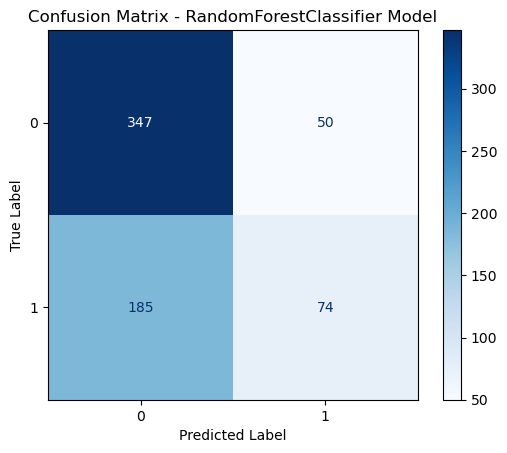

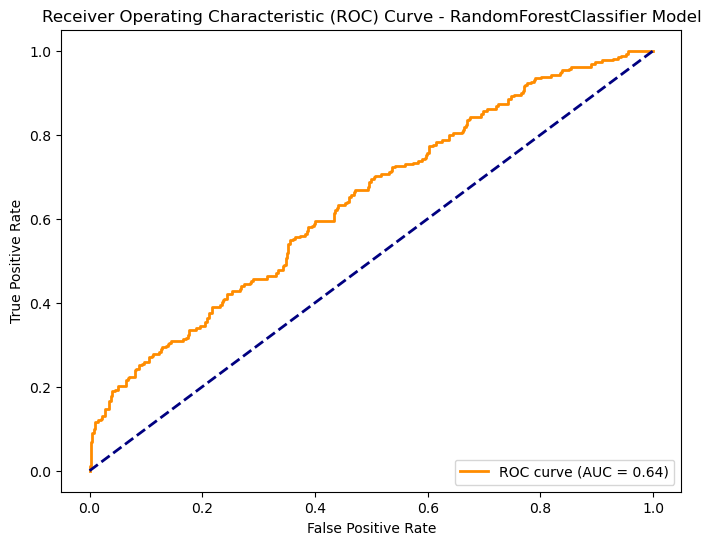

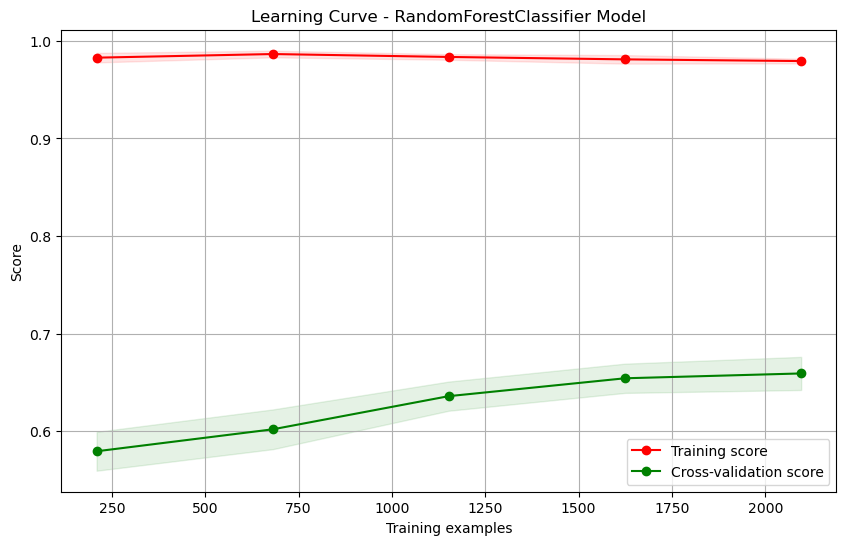

In [19]:
# Using the RandomForest model for the classification problem
model_randomForest = RandomForestClassifier()

# Hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'log2', 'sqrt', 0.5, 0.8]
}
random_search = RandomizedSearchCV(model_randomForest, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

# Training the model
random_search.fit(X_train_scaled, y_train)

best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_

# Make predictions on the test set
y_pred_randomForest = best_model_random.predict(X_test_scaled)

# Perform cross-validation
cv_score_randomForest = cross_val_score(best_model_random, X_train, y_train, cv=5) # cv is the number of folds
print(f"Cross-validation accuracy: {np.mean(cv_score_randomForest) * 100:.2f}%")

# Print cross-validation scores
print("Cross-Validation Scores:", cv_score_randomForest)
print("Mean CV Score:", np.mean(cv_score_randomForest))
print("CV Std Score:",np.std(cv_score_randomForest))
print("CV Quartile Score:",np.quantile(cv_score_randomForest, [0.025, 0.975]))

# Printing confusion matrix, classification report, accuracy score   
print("\nConfusion_matrix of RandomForestClassifier Model:\n",confusion_matrix(y_test, y_pred_randomForest))
print("\nClassification report of RandomForestClassifier Model:\n", classification_report(y_test,y_pred_randomForest))
accuracy_randomForest = accuracy_score(y_test, y_pred_randomForest)
print(f"Accuracy: {accuracy_randomForest * 100:.2f}%")

# Dummy Baseline
clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf.fit(X_train, y_train)
dummy_Score = clf.score(X_test, y_test)
print("Dummy Baseline: ", dummy_Score)

# Create confusion matrix
cm_randomForest = confusion_matrix(y_test, y_pred_randomForest)

# Display the confusion matrix using ConfusionMatrixDisplay
disp_randomForest = ConfusionMatrixDisplay(confusion_matrix=cm_randomForest, display_labels=best_model_random.classes_)
disp_randomForest.plot(cmap='Blues', values_format='d')

# Add title and labels
plt.title('Confusion Matrix - RandomForestClassifier Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

# Get the predicted probabilities for the positive class
y_prob_randomForest = best_model_random.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_randomForest)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - RandomForestClassifier Model')
plt.legend(loc='lower right')
plt.show()

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")

    return plt

# Plot learning curve for RandomForestClassifier model
plot_learning_curve(best_model_random, "Learning Curve - RandomForestClassifier Model", X_train_scaled, y_train, cv=5, n_jobs=-1)
plt.show()

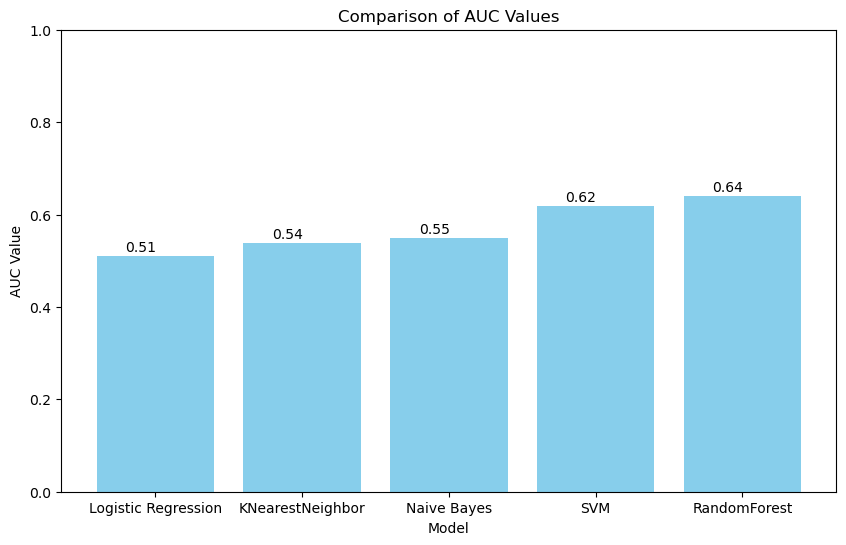

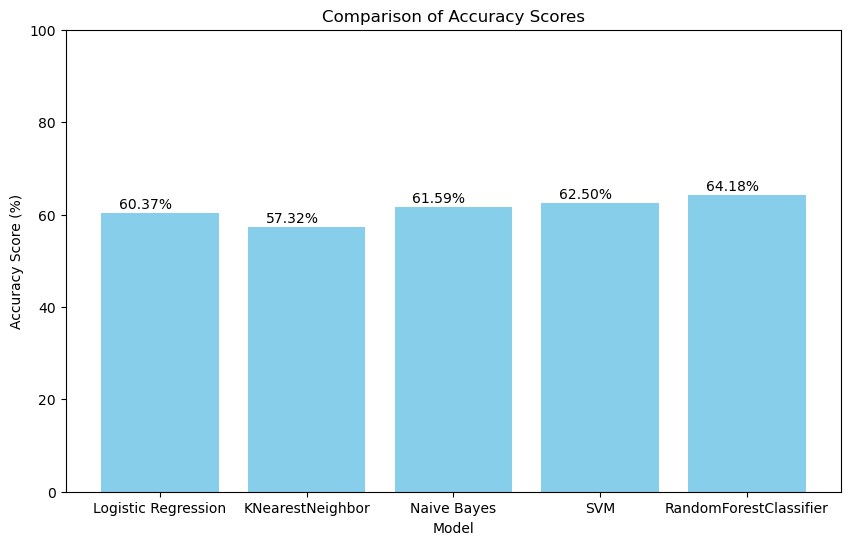

In [20]:
# Using the AUC values for each model
model_names = ['Logistic Regression', 'KNearestNeighbor', 'Naive Bayes', 'SVM', 'RandomForest']
auc_values = [roc_auc_logreg, roc_auc_knn, roc_auc_nb, roc_auc_svc, roc_auc_rf]

# Plotting AUC values
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, auc_values, color='skyblue')
plt.title('Comparison of AUC Values')
plt.xlabel('Model')
plt.ylabel('AUC Value')
plt.ylim([0, 1])  # AUC values range from 0 to 1

# Add numbers on top of the bars
for bar, auc_val in zip(bars, auc_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{auc_val:.2f}', ha='center', color='black', fontsize=10)

plt.show()

# Using the accuracy scores for each model
accuracy_scores = [accuracy_logreg, accuracy_knn, accuracy_nb, accuracy_svc, accuracy_randomForest]
model_names = ['Logistic Regression', 'KNearestNeighbor', 'Naive Bayes', 'SVM', 'RandomForestClassifier']

# Convert accuracy scores to percentage
accuracy_scores_percentage = [score * 100 for score in accuracy_scores]

# Plotting accuracy scores
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_scores_percentage, color='skyblue')
plt.title('Comparison of Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Accuracy Score (%)')
plt.ylim([0, 100])  # Accuracy scores are now in percentage format

# Add numbers on top of the bars
for bar, score in zip(bars, accuracy_scores_percentage):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 1, f'{score:.2f}%', ha='center', color='black', fontsize=10)

plt.show()



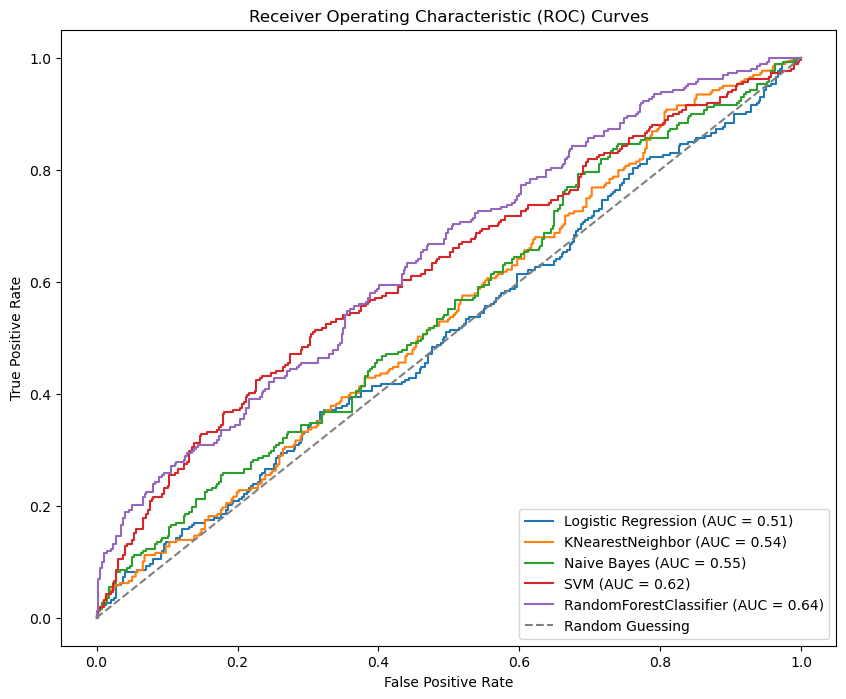

In [21]:
# Plotting all ROC curves on a single graph
plt.figure(figsize=(10, 8))

# Logistic Regression
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')

# KNearestNeighbor
plt.plot(fpr_knn, tpr_knn, label=f'KNearestNeighbor (AUC = {roc_auc_knn:.2f})')

# Naive Bayes
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')

# SVM
plt.plot(fpr_svc, tpr_svc, label=f'SVM (AUC = {roc_auc_svc:.2f})')

# RandomForestClassifier
plt.plot(fpr_rf, tpr_rf, label=f'RandomForestClassifier (AUC = {roc_auc_rf:.2f})')

# Random Guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')

# Show the plot
plt.show()


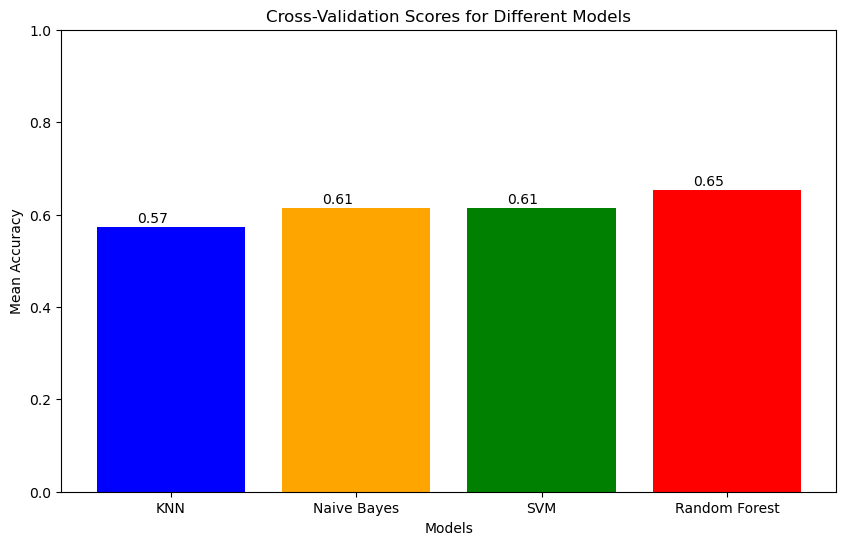

In [22]:
# CV Score

models = ['KNN', 'Naive Bayes', 'SVM', 'Random Forest']
scores = [np.mean(cv_score_knn), np.mean(cv_score_nb), np.mean(cv_score_svc), np.mean(cv_score_randomForest)]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(models, scores, color=['blue', 'orange', 'green', 'red'])
plt.ylim([0, 1])  # Adjust the y-axis limit if needed
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Models')
plt.ylabel('Mean Accuracy')

# Add numbers on top of the bars
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{score:.2f}', ha='center', color='black', fontsize=10)

plt.show()

# CA1 Classification report:
***
## Background exploration/research:
- **pH:** Measures the acidity or alkalinity of the water.
- **Hardness:** Represents the concentration of minerals, mainly calcium and magnesium.
- **Solids:** Refers to the total dissolved solids in the water, measured in mg/L.
- **Chloramines:** Indicates the presence of chloramines in the water, a disinfectant used in water treatment.
- **Sulfate:** Represents the concentration of sulfate ions in the water.
- **Conductivity:** Measures the ability of water to conduct an electric current, often correlated with the concentration of ions.
- **Organic_carbon:** Represents the amount of organic carbon in the water, which can affect water quality.
- **Trihalomethanes:** Indicates the concentration of trihalomethanes, formed during water disinfection.
- **Clarity:** Represents the clarity or turbidity of the water.
- **Quality:** Represents the quality of the water.

***

#### 1. How is your prediction task defined? And what is the meaning of the output variable?

- The output variable/target is the variable you are trying to predict. In this case, it is the water quality.
- Our prediction task is the prediction of water quality based on the properties of water.

***

#### 2. Did you process the features in any way?

Preprocessing of the data was done before the data was used for the different classification in machine learning. Some of the preprocessing ways are:
- Removing of NaN values
  - By using ```from sklearn.impute import SimpleImputer``` and code ```imp_quality = SimpleImputer(strategy="most_frequent")```, I removed the NaN values and imputed it to the most frequent values that appeared in the data.
- Scaling of the values
  - By using ```from sklearn.preprocessing import StandardScaler```. Certain models such as Knn are sensitive to outliers, hence by scaling the data, the performance and accuracy of these models would be improved.

***

#### 3. How did you select which learning algorithms to use?

As different learning algorithms perform differently based on the nature of the data and the problem at hand, selecting a model is important. Therefore, I have selected these models.

After consideration, the models I have used are:
- Logistic Regression
  -  Used to predict the probability of a binary outcome based on one or more independent variables

- K-Nearest Neighbours
  - Finds the k nearest neighbors of a new data point and uses the class labels or values of those neighbors to classify or predict the value of the new data point

- Naive Bayes
  - Assumes the presence or absence of a particular feature is independent of the presence or absence of any other feature

- Support Vector Machines (SVC)
  - Well-suited for problems with high-dimensional data and can handle both linear and nonlinear relationships between features and target variables

- Random Forest
  - Combines the predictions of multiple decision trees to obtain a more accurate and stable prediction  

***

#### 4. Did you try to tune the hyperparameters of the learning algorithm, and in that case how?

Hyperparameter tuning is the process of selecting the best values for the hyperparameters of a machine learning model. This is crucial for optimizing the performance of the model, as different values can lead to significant differences in accuracy, generalization, and other performance metrics. Different learning models also have different hyperparameters that can be adjusted and set. 

The hyperparameters I have set/changed for each respective model are:
- Logistic Regression
  -  The C parameter: 
        - Controls the trade-off between regularization and model complexity. A higher value of C results in stronger regularization and lower model complexity, while a lower value of C results in weaker regularization and higher model complexity.
  - Penalty: 
    - The penalty parameter controls the amount of regularization applied to the model. Regularization helps prevent overfitting and improve the model's generalization ability. 
  - Solver: 
    - It determines the optimization algorithm used to train the logistic regression model. 
 
- K-Nearest Neighbours
  - n_neighbors:
    - This parameter determines the number of nearest neighbors to consider when making predictions. A larger value of n_neighbors tends to smooth out noise and provide more stable predictions, but it may also increase the risk of overfitting.
  - weights:
    - This parameter specifies how to weight the contributions of the nearest neighbors when making predictions. 

- Naive Bayes
  - var_smoothing:
    - This parameter controls the smoothing of the variances used for estimating the probability of each feature given each class. A higher value of var_smoothing adds more weight to the overall variance of the data, preventing the model from overfitting to specific data points. 

- Support Vector Machines (SVC)
  - C:
    - This parameter controls the regularization strength of the SVM model. A higher value of C leads to a stronger penalty for misclassification errors, which can help prevent overfitting but may also reduce the model's generalization ability. A lower value of C leads to a weaker penalty and may allow the model to better capture complex patterns in the data.
  - kernel:
    - This parameter specifies the kernel function used to map the data into a higher-dimensional space, where the data can be separated more easily by a linear hyperplane.
  - gamma:
    - This parameter is used with the 'rbf' and 'sigmoid' kernels to control the width of the Gaussian radial basis function or the sigmoid function. A higher value of gamma leads to a narrower kernel, which means that the model will focus more on local patterns in the data. A lower value of gamma leads to a wider kernel, which means that the model will consider more global patterns in the data. 

- Random Forest
  - n_estimators:
    - This parameter determines the number of decision trees to build in the random forest. A higher number of trees generally leads to better performance, but it also increases the computational cost. 
  - max_depth:
    - This parameter controls the maximum depth of each decision tree in the random forest. A deeper tree can capture more complex patterns in the data, but it is also more prone to overfitting. A shallower tree may not capture all the relevant information in the data, but it is less likely to overfit. 
  - min_samples_split:
    - This parameter specifies the minimum number of training data points required to split an internal node in a decision tree. A higher value of min_samples_split prevents overfitting by ensuring that each split is based on a sufficient amount of data. A lower value of min_samples_split may allow the model to capture more complex patterns in the data, but it may also lead to overfitting.
  - min_samples_leaf:
    - This parameter specifies the minimum number of training data points required to be in a leaf node in a decision tree. A higher value of min_samples_leaf prevents overfitting by ensuring that each leaf node is sufficiently populated. A lower value of min_samples_leaf may allow the model to capture more local patterns in the data, but it may also lead to overfitting. 
  - max_features:
    - This parameter controls the number of features to consider when splitting an internal node in a decision tree. A higher value of max_features allows the model to consider more features and may improve its accuracy, but it can also lead to overfitting. A lower value of max_features may reduce the risk of overfitting, but it may also limit the model's ability to capture complex patterns in the data. 

I also used crossvalidation in order to prevent overfitting, provide a more realistic estimate of the model's generalization ability and reduces bias as this reduces the impact of random fluctuations in the training data. Enables hyperparameter tuning: Helps to select the optimal hyperparameter values for the model.

Some examples of CrossValidation:
  - k-fold cross-validation:
    - The data is divided into k subsets (folds). The model is trained on k-1 folds and evaluated on the remaining fold. This process is repeated k times, with each fold being used as the evaluation set once.
  - Leave-one-out cross-validation (LOO-CV):
    - The data is divided into n subsets, where n is the number of data points. The model is trained on n-1 data points and evaluated on the remaining data point. This process is repeated n times, with each data point being used as the evaluation set once.
  - Stratified cross-validation:
    - This method is used when the data has a natural class imbalance. It ensures that each fold has approximately the same proportion of data points from each class.

***

#### 5. How do you evaluate the quality of your system?

I evaluated my models using different ways such as classification report, confusion matrix, accuracy score, learning curve, ROC curve and AUC, dummy baseline.

- Accuracy score:
  - The performance of classification models. It measures the proportion of correct predictions made by the model, expressed as a percentage.

- Confusion Report:
  - Able to display the precision, recall, f1-score, support
    - Precision = Proportion of positive predictions that are truly positive. Useful for evaluating the model's ability to correctly identify true positives.
    - Recall = Measures the proportion of positive cases that the model correctly identifies. Useful for evaluating the model's ability to avoid missing true positives.
    - F1-score = Measure of a model's accuracy that considers both precision and recall. Useful in imbalanced datasets where precision and recall may be more important than overall accuracy.
    - Support = The number of actual occurrences of a particular class in the dataset.

- Confusion matrix:
  - Tabular representation of the model's predictions, comparing the predicted labels against the actual labels.

- ROC/AUC curve:
  - A perfect classifier would achieve a TPR of 1 and an FPR of 0, resulting in a curve that reaches the top-left corner of the graph, so evaluation can be done by comparing how curved the curve is towards the top left of the graph. 
  - A higher AUC value indicates better overall performance, as it suggests that the model is able to distinguish between positive and negative cases more effectively.

- Learning curve:
  - Visually represents how well the model learns from the data as it is trained with increasing amounts of data or training time.

***

#### 6. How well does your systems compare to a dummy baseline?

A dummy baseline is a simple model that serves as a reference point for evaluating the performance of more complex models. If a more complex model fails to outperform the dummy baseline, it suggests that the model is not effectively capturing the underlying patterns in the data. The system chosen is the RandomForest model as it has the best evaluation score across all measurements. The model has an accuracy of 64.33% while the dummy baseline has an accuracy of 60.51%.

***

#### 7. Is it possible to say something about which features the model considers important?

- Logistic Regression
  - Importance of Coefficients: 
    - The coefficients assigned to each feature in the logistic regression model indicate the direction and strength of the relationship between that feature and the log-odds of the response variable. Larger magnitude coefficients suggest a stronger impact on the prediction.

- K-nearest neighbors
  - Unlike logistic regression, where feature importance is directly reflected by the coefficients, KNN does not directly provide explicit measures of feature importance. But we can do Feature Sensitivity Analysis which involves systematically removing or modifying each feature and observing the change in the model's performance metric, such as accuracy. Features that cause a significant decrease in performance when removed or modified are considered more important.

- Naive Bayes
  - Similar to KNN, NB does not directly provide explicit measures of feature importance. But we can do feature Visualization to see the relationship between features and the target variable can provide insights into the importance of different features. Techniques like scatter plots, correlation matrices, and partial dependence plots can be helpful.

- Support Vector Machines (SVC)
  - Similar to other models like KNN and Naive Bayes, SVM does not directly provide explicit measures of feature importance. 

- Random Forest
  - Gini Importance:
    - This metric measures the average decrease in Gini impurity across all splits in the forest that use a particular feature. Features with higher Gini importance values are considered more important.

  - Mean Decrease in Accuracy:
    - This metric measures the average decrease in accuracy when a particular feature is permuted across all out-of-bag data. Features with higher mean decrease in accuracy values are considered more important.

